In [129]:
import numpy as np
import pandas as pd


In [130]:
df = pd.read_csv('diabetes_data_upload.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [131]:
# replace the values in the DataFrome with .replace
df = df.replace('No',0)
df = df.replace('Yes',1)

df = df.replace('Positive',1)
df = df.replace('Negative',0)

df = df.replace('Male',1)
df = df.replace('Female',0)

#check for missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [132]:
#Replace column Gender to isMale
replace = {'Gender':'ismale'}
df = df.rename(columns=replace)
# convert every column to lowercase
df.columns = df.columns.str.lower()
df

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [133]:
df.to_csv('diabetes_data_clean.csv',index=None)

### Summary
1. Collected the data from UCI Repo
2. Replaced strings to 1's & 0's
3. Replaced changed column names
4. Lowercased everything in columns
5. Exported the clean DataFrame to a new CSV

In [134]:
# !pip install statsmodels
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

In [138]:
# read our CSV into a DataFrame
df = pd.read_csv('diabetes_data_clean.csv')
df

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


(array([  1.,  44.,  83., 103.,  91., 118.,  46.,  29.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <BarContainer object of 10 artists>)

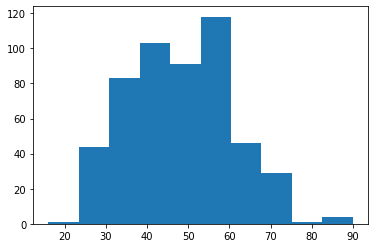

In [139]:
plt.hist(df['age'])

In [140]:
df['age'].mean()

48.02884615384615

In [141]:
df['age'].median()

47.5

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


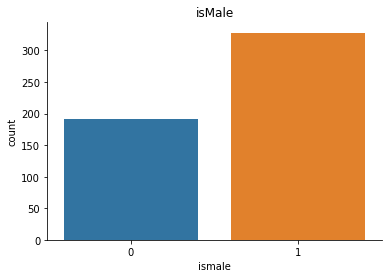

In [142]:
sns.countplot(df['ismale'])
plt.title('isMale')
sns.despine()

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


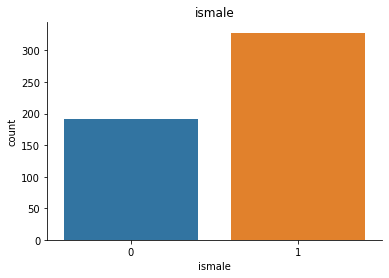

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


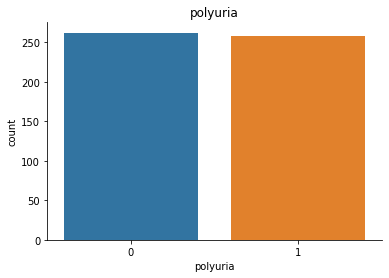

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


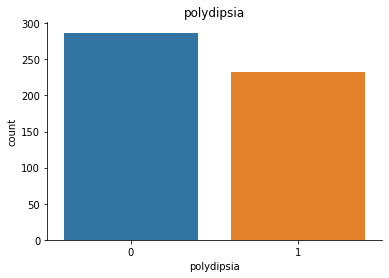

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


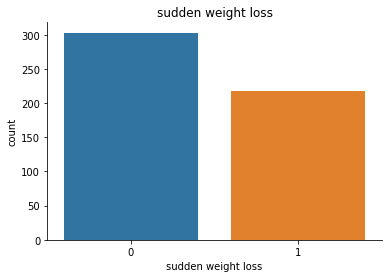

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


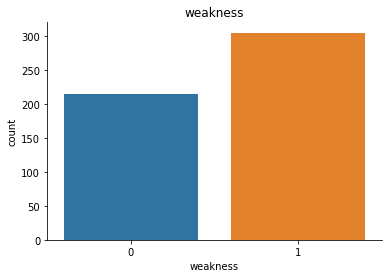

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


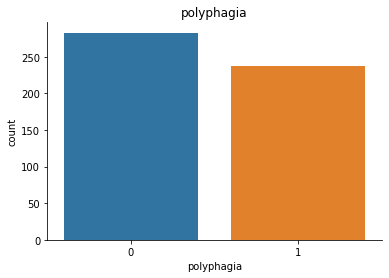

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


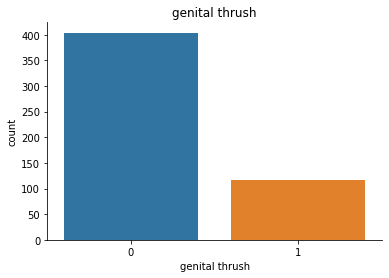

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


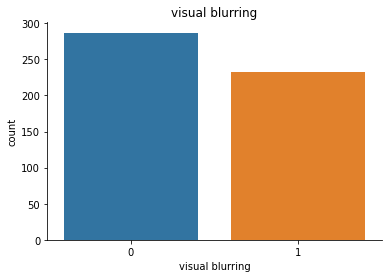

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


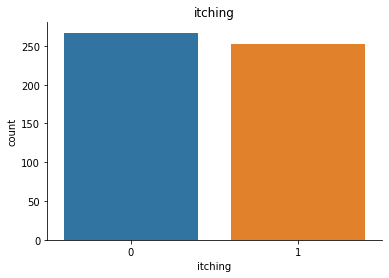

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


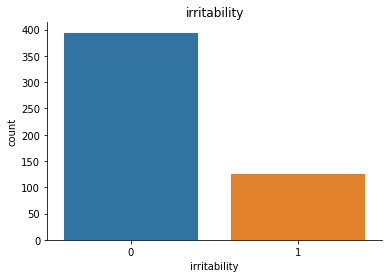

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


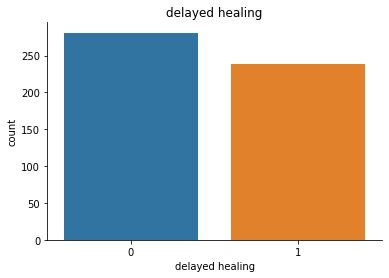

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


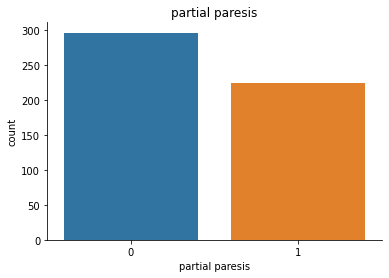

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


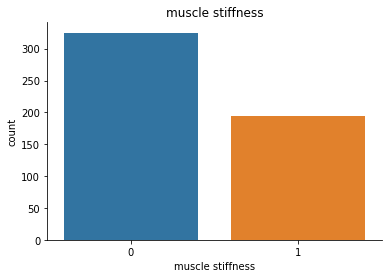

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


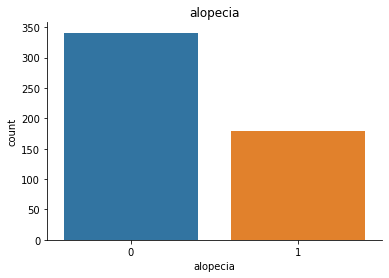

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


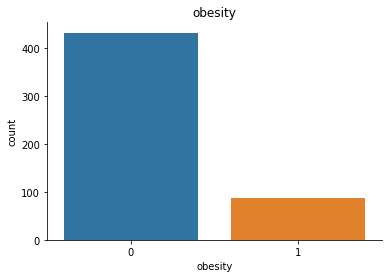

C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


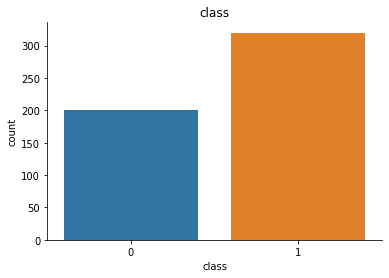

In [143]:
#plotting all the columns except the first one (age column)
columns = df.columns[1:]

for column in columns:
    sns.countplot(df[column])
    plt.title(column)
    sns.despine()
    plt.show()

### Questions:
1. is obesity related to diabetes status?
2. is ismale related to diabetes status?

In [144]:
obesity_diabetes_crosstab = pd.crosstab(df['class'],df['obesity'])
obesity_diabetes_crosstab

obesity,0,1
class,,
0,173,27
1,259,61


In [145]:
chi2_contingency(obesity_diabetes_crosstab)

(2.3274739583333344,
 0.12710799319896815,
 1,
 array([[166.15384615,  33.84615385],
        [265.84615385,  54.15384615]]))

In [146]:
ismale_diabetes_crosstab = pd.crosstab(df['class'],df['ismale'])
ismale_diabetes_crosstab

ismale,0,1
class,,
0,19,181
1,173,147


In [147]:
chi2_contingency(ismale_diabetes_crosstab)

(103.03685927972558,
 3.289703730553317e-24,
 1,
 array([[ 73.84615385, 126.15384615],
        [118.15384615, 201.84615385]]))

### Suggestions
1. polyuria vs class
2. polyuria vs ismale 

In [148]:
polyuria_class_crosstab = pd.crosstab(df['polyuria'],df['class'])
print(polyuria_class_crosstab)
print()
polyuria_ismale_crosstab = pd.crosstab(df['polyuria'],df['ismale'])
print(polyuria_ismale_crosstab)

class       0    1
polyuria          
0         185   77
1          15  243

ismale      0    1
polyuria          
0          63  199
1         129  129


In [149]:
print(chi2_contingency(polyuria_class_crosstab))
print(chi2_contingency(polyuria_ismale_crosstab))

(227.86583895496773, 1.7409117803442155e-51, 1, array([[100.76923077, 161.23076923],
       [ 99.23076923, 158.76923077]]))
(36.49184228561174, 1.5330652930649977e-09, 1, array([[ 96.73846154, 165.26153846],
       [ 95.26153846, 162.73846154]]))


45.0
48.0


C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


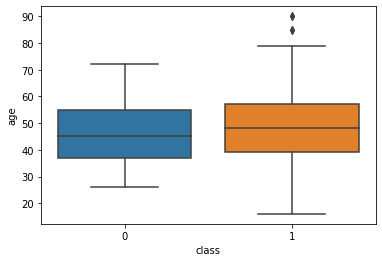

In [150]:
#is there any relation  between age and diabetic status?
sns.boxplot(df['class'],df['age'])

no_diabetes = df[df['class'] == 0]
print(no_diabetes['age'].median())

diabetes = df[df['class'] == 1]
print(diabetes['age'].median())

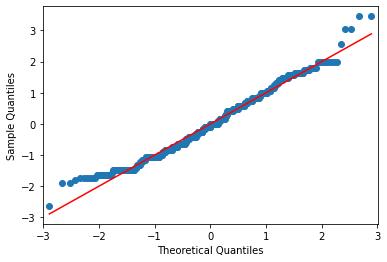

In [151]:
qqplot(df['age'],fit=True,line='s')
plt.show()

In [152]:
ztest(diabetes['age'],no_diabetes['age'])

(2.4882300316303065, 0.012838066562901769)

<AxesSubplot:>

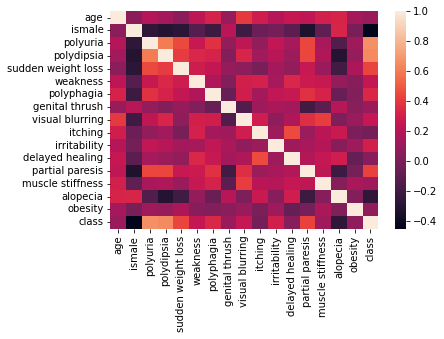

In [153]:
# get a correlation plot
sns.heatmap(df.corr())

### Summary
1. Looked at the single column (univariate analysis)
2. Looked at the relationship between two columns (bivariate analysis)
3. Conducted a statistical test of difference between ages of non-diabetic patients
4. Plotted a correlation heatmap 

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [155]:
df = pd.read_csv('diabetes_data_clean.csv')
df

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [156]:
# Prepare dependent and independent variables
x = df.drop('class',axis=1)
y = df['class']

In [157]:
# Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)
dummy = DummyClassifier()
dummy.fit(x_train,y_train)
dummy_pred = dummy.predict(x_test)

In [158]:
# assess dummy classifier model
confusion_matrix(y_test,dummy_pred)

array([[ 0, 40],
       [ 0, 64]], dtype=int64)

In [159]:
print(classification_report(y_test,dummy_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.62      1.00      0.76        64

    accuracy                           0.62       104
   macro avg       0.31      0.50      0.38       104
weighted avg       0.38      0.62      0.47       104



C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NITANSSHU JAIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
# start with Logistic Regression
logr = LogisticRegression(max_iter=100000)
logr.fit(x_train,y_train)
logr_pred = logr.predict(x_test)

In [161]:
confusion_matrix(y_test,logr_pred)

array([[37,  3],
       [ 8, 56]], dtype=int64)

In [162]:
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        40
           1       0.95      0.88      0.91        64

    accuracy                           0.89       104
   macro avg       0.89      0.90      0.89       104
weighted avg       0.90      0.89      0.90       104



In [163]:
# try Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)

In [164]:
confusion_matrix(y_test,tree_pred)

array([[39,  1],
       [ 1, 63]], dtype=int64)

In [165]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [176]:
# try RandomForest
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
forest_pred = forest.predict(x_test)

In [177]:
confusion_matrix(y_test,forest_pred)

array([[40,  0],
       [ 2, 62]], dtype=int64)

In [178]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [179]:
forest.feature_importances_

array([0.10486472, 0.08380633, 0.23921299, 0.17169788, 0.055951  ,
       0.02248019, 0.03722431, 0.02193462, 0.02925805, 0.02586356,
       0.04664347, 0.03364726, 0.05722799, 0.01994917, 0.03249839,
       0.01774008])

In [180]:
x.columns

Index(['age', 'ismale', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity'],
      dtype='object')

In [182]:
pd.DataFrame({'feature':x.columns,'importance':forest.feature_importances_}).sort_values('importance',ascending=False)

,feature,importance
2,polyuria,0.239213
3,polydipsia,0.171698
0,age,0.104865
1,ismale,0.083806
12,partial paresis,0.057228
4,sudden weight loss,0.055951
10,irritability,0.046643
6,polyphagia,0.037224
11,delayed healing,0.033647
14,alopecia,0.032498


### Summary
1. Trained a baseline model (dummy classifier)
2. Trained 3 different models - logistic regression, decision tree, random forest
3. Identified the best features in the best performing model.